# Project Overview
# Contribution breakdown (%) per member 
- Đinh Gia Bảo - 11220788 - 12.5%
- Lê Trọng Hiệp - 11222286 - 12.5%
- Đào Trọng Hưng - 11222595 - 12.5%
- Nguyễn Lê Anh Minh - 11224245 - 12.5%
- Đỗ Sơn Nam - 11224438 - 12.5%
- Nguyễn Đức Anh - 11220321 - 12.5%
- Bùi Bảo Quang - 11225416 - 12.5%
- Phạm Quốc Việt - 11226910 - 12.5%

# Instructions to run the code
- Run using VScode version 1.100.2.
- Install python, java version 11, correct hadoop version.
- Download the data .csv.

# E-commerce Customer Data Analysis with PySpark

## Introduction

This project analyzes e-commerce customer data to uncover insights about:
- Customer purchase patterns
- Product category performance  
- Payment method preferences
- Customer segmentation and churn analysis
- Demographic insights

## Dataset Overview


In [ ]:
# Import libraries
import matplotlib.pyplot as plt
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.clustering import GaussianMixture
from pyspark.ml.regression import LinearRegression
from pyspark.ml.classification import LogisticRegression, RandomForestClassifier
from pyspark.ml.evaluation import RegressionEvaluator, BinaryClassificationEvaluator

import os
os.environ["JAVA_HOME"] = "C:/Program Files/Java/jdk-11"
os.environ["PATH"] = os.environ["JAVA_HOME"] + "/bin:" + os.environ["PATH"]

# Initialize Spark Session
spark = SparkSession.builder \
    .appName("EcommerceAnalysis") \
    .config("spark.driver.memory", "4g") \
    .config("spark.executor.memory", "4g") \
    .getOrCreate()


25/05/14 00:39:27 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


In [ ]:
# Load dataset
df = spark.read.csv("/Users/ADMIN/Desktop/Bigdatafinal/PhanTich-main/ecommerce_customer_data_custom_ratios.csv", 
                    header=True, inferSchema=True)

25/05/14 00:39:29 WARN SQLConf: The SQL config 'spark.sql.legacy.parquet.int96RebaseModeInWrite' has been deprecated in Spark v3.2 and may be removed in the future. Use 'spark.sql.parquet.int96RebaseModeInWrite' instead.
25/05/14 00:39:29 WARN SQLConf: The SQL config 'spark.sql.legacy.parquet.int96RebaseModeInWrite' has been deprecated in Spark v3.2 and may be removed in the future. Use 'spark.sql.parquet.int96RebaseModeInWrite' instead.
25/05/14 00:39:29 WARN SQLConf: The SQL config 'spark.sql.legacy.parquet.int96RebaseModeInWrite' has been deprecated in Spark v3.2 and may be removed in the future. Use 'spark.sql.parquet.int96RebaseModeInWrite' instead.
25/05/14 00:39:29 WARN SQLConf: The SQL config 'spark.sql.legacy.parquet.int96RebaseModeInWrite' has been deprecated in Spark v3.2 and may be removed in the future. Use 'spark.sql.parquet.int96RebaseModeInWrite' instead.
25/05/14 00:39:29 WARN SQLConf: The SQL config 'spark.sql.legacy.parquet.int96RebaseModeInWrite' has been deprecated

In [129]:
# Basic dataset information
print("Dataset Shape:")
print(f"Rows: {df.count()}")
print(f"Columns: {len(df.columns)}")


Dataset Shape:
Rows: 250000
Columns: 13


In [41]:
# Display schema
print("\nDataset Schema:")
df.printSchema()



Dataset Schema:
root
 |-- Customer ID: integer (nullable = true)
 |-- Purchase Date: string (nullable = true)
 |-- Product Category: string (nullable = true)
 |-- Product Price: integer (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- Total Purchase Amount: integer (nullable = true)
 |-- Payment Method: string (nullable = true)
 |-- Customer Age: integer (nullable = true)
 |-- Returns: double (nullable = true)
 |-- Customer Name: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Churn: integer (nullable = true)



In [42]:
# Show sample data
print("\nSample Data:")
df.show(5)


Sample Data:
+-----------+-------------------+----------------+-------------+--------+---------------------+--------------+------------+-------+-------------------+---+------+-----+
|Customer ID|      Purchase Date|Product Category|Product Price|Quantity|Total Purchase Amount|Payment Method|Customer Age|Returns|      Customer Name|Age|Gender|Churn|
+-----------+-------------------+----------------+-------------+--------+---------------------+--------------+------------+-------+-------------------+---+------+-----+
|      46251|2020-09-08 09:38:32|     Electronics|           12|       3|                  740|   Credit Card|          37|    0.0|Christine Hernandez| 37|  Male|    0|
|      46251|2022-03-05 12:56:35|            Home|          468|       4|                 2739|        PayPal|          37|    0.0|Christine Hernandez| 37|  Male|    0|
|      46251|2022-05-23 18:18:01|            Home|          288|       2|                 3196|        PayPal|          37|    0.0|Christine 

## Project Objectives

1. **Exploratory Data Analysis (EDA)**
   - Data quality assessment
   - Statistical summaries
   - Missing value analysis

2. **Customer Behavior Analysis**
   - Purchase frequency patterns
   - Average order value analysis
   - Product category performance

3. **Customer Segmentation**
   - RFM (Recency, Frequency, Monetary) analysis
   - Demographic segmentation
   - Churn prediction

4. **Business Insights**
   - Revenue trends
   - Customer lifetime value
   - Payment method analysis

## Expected Deliverables

1. Data quality report
2. Customer segmentation model
3. Visualization dashboard
4. Business recommendations
5. Predictive models for churn

# Project Methods
# Data Processing and Analysis Methodology

In [44]:
# Import all required libraries
import findspark
findspark.init()

from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import *
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.clustering import KMeans
from pyspark.ml.classification import LogisticRegression, RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator, BinaryClassificationEvaluator
from pyspark.ml import Pipeline
import pyspark.sql.functions as F


In [45]:
# Visualization libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Set visualization style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

## Spark Configuration

In [46]:
# Configure Spark Session with optimized settings
spark = SparkSession.builder \
    .appName("EcommerceAnalysisAdvanced") \
    .config("spark.driver.memory", "8g") \
    .config("spark.executor.memory", "8g") \
    .config("spark.driver.maxResultSize", "2g") \
    .config("spark.sql.adaptive.enabled", "true") \
    .config("spark.sql.adaptive.coalescePartitions.enabled", "true") \
    .getOrCreate()

# Set logging level
spark.sparkContext.setLogLevel("WARN")

## Data Loading and Initial Processing

In [ ]:
# Load data with proper schema
df = spark.read.csv("Users/ADMIN/Desktop/Bigdatafinal/PhanTich-main/ecommerce_customer_data_custom_ratios.csv", 
                    header=True, inferSchema=True)

# Cache dataset for multiple operations
df.cache()

# Data type conversion if needed
df = df.withColumn("Purchase Date", to_date(col("Purchase Date"), "yyyy-MM-dd"))

25/05/13 23:22:09 WARN SQLConf: The SQL config 'spark.sql.legacy.parquet.int96RebaseModeInWrite' has been deprecated in Spark v3.2 and may be removed in the future. Use 'spark.sql.parquet.int96RebaseModeInWrite' instead.
25/05/13 23:22:09 WARN SQLConf: The SQL config 'spark.sql.legacy.parquet.int96RebaseModeInWrite' has been deprecated in Spark v3.2 and may be removed in the future. Use 'spark.sql.parquet.int96RebaseModeInWrite' instead.
25/05/13 23:22:09 WARN SQLConf: The SQL config 'spark.sql.legacy.parquet.int96RebaseModeInWrite' has been deprecated in Spark v3.2 and may be removed in the future. Use 'spark.sql.parquet.int96RebaseModeInWrite' instead.
25/05/13 23:22:09 WARN SQLConf: The SQL config 'spark.sql.legacy.parquet.datetimeRebaseModeInWrite' has been deprecated in Spark v3.2 and may be removed in the future. Use 'spark.sql.parquet.datetimeRebaseModeInWrite' instead.
25/05/13 23:22:09 WARN SQLConf: The SQL config 'spark.sql.legacy.parquet.int96RebaseModeInWrite' has been depr

## Data Quality Assessment Methods

In [51]:
# Function to check data quality
def assess_data_quality(df):
    """Comprehensive data quality assessment"""
    
    # 1. Missing values analysis
    print("Missing Values Analysis:")
    missing_values = df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns])
    missing_values.show()

In [52]:
# Function to check data quality
def assess_data_quality(df):
    """Comprehensive data quality assessment"""
    
    # 1. Missing values analysis
    print("Missing Values Analysis:")
    missing_values = df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns])
    missing_values.show()
    
    # 2. Duplicate records
    total_records = df.count()
    unique_records = df.distinct().count()
    print(f"\nDuplicate Analysis:")
    print(f"Total records: {total_records}")
    print(f"Unique records: {unique_records}")
    print(f"Duplicates: {total_records - unique_records}")
    
    # 3. Data types validation
    print("\nData Types:")
    df.printSchema()
    
    # 4. Statistical summary
    numeric_cols = [f.name for f in df.schema.fields if f.dataType in [IntegerType(), DoubleType(), FloatType()]]
    df.select(numeric_cols).describe().show()
    
    return df

# Apply data quality assessment

In [53]:
df_clean = assess_data_quality(df)

Missing Values Analysis:
+-----------+-------------+----------------+-------------+--------+---------------------+--------------+------------+-------+-------------+---+------+-----+
|Customer ID|Purchase Date|Product Category|Product Price|Quantity|Total Purchase Amount|Payment Method|Customer Age|Returns|Customer Name|Age|Gender|Churn|
+-----------+-------------+----------------+-------------+--------+---------------------+--------------+------------+-------+-------------+---+------+-----+
|          0|            0|               0|            0|       0|                    0|             0|           0|  47596|            0|  0|     0|    0|
+-----------+-------------+----------------+-------------+--------+---------------------+--------------+------------+-------+-------------+---+------+-----+


Duplicate Analysis:
Total records: 250000
Unique records: 250000
Duplicates: 0

Data Types:
root
 |-- Customer ID: integer (nullable = true)
 |-- Purchase Date: date (nullable = true)
 |--

## Feature Engineering Methods

In [54]:
# Feature engineering functions
def create_rfm_features(df):
    """Create RFM (Recency, Frequency, Monetary) features"""
    
    # Get the latest purchase date
    max_date = df.agg(max("Purchase Date")).collect()[0][0]
    
    # Calculate RFM metrics
    rfm = df.groupBy("Customer ID").agg(
        # Recency: days since last purchase
        datediff(lit(max_date), max("Purchase Date")).alias("Recency"),
        # Frequency: number of purchases
        count("Purchase Date").alias("Frequency"),
        # Monetary: total amount spent
        sum("Total Purchase Amount").alias("Monetary")
    )
    
    return rfm

def create_customer_profile(df):
    """Create comprehensive customer profiles"""
    
    customer_profile = df.groupBy("Customer ID", "Customer Name", "Age", "Gender").agg(
        # Purchase behavior
        count("Purchase Date").alias("Total_Purchases"),
        sum("Total Purchase Amount").alias("Total_Spent"),
        avg("Total Purchase Amount").alias("Avg_Order_Value"),
        sum("Quantity").alias("Total_Items"),
        
        # Product preferences
        F.mode("Product Category").alias("Preferred_Category"),
        F.mode("Payment Method").alias("Preferred_Payment"),
        
        # Time-based features
        datediff(max("Purchase Date"), min("Purchase Date")).alias("Customer_Lifetime_Days"),
        
        # Return behavior
        sum("Returns").alias("Total_Returns"),
        avg("Returns").alias("Avg_Returns_Rate")
    )
    
    return customer_profile

## Analysis Methods

In [55]:
# Statistical analysis methods
def perform_statistical_analysis(df):
    """Perform various statistical analyses"""
    
    # Correlation analysis
    numeric_cols = [f.name for f in df.schema.fields if f.dataType in [IntegerType(), DoubleType(), FloatType()]]
    
    # Convert to pandas for correlation calculation
    pandas_df = df.select(numeric_cols).toPandas()
    correlation_matrix = pandas_df.corr()
    
    # Visualize correlation matrix
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Feature Correlation Matrix')
    plt.tight_layout()
    plt.show()
    
    return correlation_matrix

In [56]:
# Customer segmentation method
def perform_customer_segmentation(df):
    """Implement K-means clustering for customer segmentation"""
    
    # Prepare features for clustering
    feature_cols = ["Recency", "Frequency", "Monetary"]
    assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
    
    # Standardize features
    scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures")
    
    # K-means clustering
    kmeans = KMeans(featuresCol="scaledFeatures", k=4, predictionCol="segment")
    
    # Create pipeline
    pipeline = Pipeline(stages=[assembler, scaler, kmeans])
    
    return pipeline

## Model Development Methods

In [57]:
# Churn prediction model
def build_churn_model(df):
    """Build churn prediction model using Random Forest"""
    
    # Prepare features
    feature_cols = ["Age", "Total_Purchases", "Total_Spent", "Avg_Order_Value", 
                    "Customer_Lifetime_Days", "Total_Returns"]
    
    assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
    
    # Split data
    train_data, test_data = df.randomSplit([0.8, 0.2], seed=42)
    
    # Random Forest model
    rf = RandomForestClassifier(featuresCol="features", labelCol="Churn", numTrees=100)
    
    # Pipeline
    pipeline = Pipeline(stages=[assembler, rf])
    
    # Train model
    model = pipeline.fit(train_data)
    
    # Evaluate model
    predictions = model.transform(test_data)
    evaluator = BinaryClassificationEvaluator(labelCol="Churn", metricName="areaUnderROC")
    auc = evaluator.evaluate(predictions)
    
    print(f"Model AUC: {auc}")
    
    return model

## Visualization Methods

In [58]:
# Visualization helper functions
def create_interactive_plots(df):
    """Create interactive visualizations using Plotly"""
    
    # Revenue trends
    revenue_trends = df.groupBy("Product Category").agg(
        sum("Total Purchase Amount").alias("Total Revenue")
    ).toPandas()
    
    fig = px.bar(revenue_trends, x="Product Category", y="Total Revenue",
                 title="Revenue by Product Category")
    fig.show()
    
    # Customer age distribution
    age_dist = df.select("Age").toPandas()
    fig = px.histogram(age_dist, x="Age", nbins=30, title="Customer Age Distribution")
    fig.show()

## Validation and Testing

In [59]:
# Cross-validation for model evaluation
def perform_cross_validation(pipeline, df):
    """Perform k-fold cross-validation"""
    
    from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
    from pyspark.ml.evaluation import MulticlassClassificationEvaluator
    
    # Parameter grid
    paramGrid = ParamGridBuilder() \
        .addGrid(rf.numTrees, [50, 100, 200]) \
        .addGrid(rf.maxDepth, [5, 10, 15]) \
        .build()
    
    # Cross validator
    crossval = CrossValidator(estimator=pipeline,
                            estimatorParamMaps=paramGrid,
                            evaluator=MulticlassClassificationEvaluator(),
                            numFolds=5)
    
    # Run cross-validation
    cvModel = crossval.fit(df)
    
    return cvModel.bestModel

## Performance Optimization

In [60]:
# Optimize Spark performance
def optimize_spark_performance():
    """Configure Spark for optimal performance"""
    
    # Repartition data if needed
    df_optimized = df.repartition(8)  # Adjust based on your cluster size
    
    # Persist frequently used DataFrames
    df_optimized.cache()
    
    # Use broadcast joins for small DataFrames
    broadcast_df = broadcast(df_optimized)
    
    return df_optimized

In [61]:
print("Project methods setup complete!")
print("Ready to proceed with data analysis...")

Project methods setup complete!
Ready to proceed with data analysis...


# Data Analysis
# Comprehensive E-commerce Data Analysis

## Setup and Data Loading


In [ ]:
# Import required libraries
import findspark
findspark.init()

from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import *
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.clustering import KMeans
from pyspark.ml.classification import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Initialize Spark
spark = SparkSession.builder \
    .appName("EcommerceDataAnalysis") \
    .config("spark.driver.memory", "8g") \
    .config("spark.executor.memory", "8g") \
    .getOrCreate()

# Load data
df = spark.read.csv("Users/ADMIN/Desktop/Bigdatafinal/PhanTich-main/ecommerce_customer_data_custom_ratios.csv", 
                    header=True, inferSchema=True)


25/05/13 23:29:50 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.
25/05/13 23:29:50 WARN SQLConf: The SQL config 'spark.sql.legacy.parquet.int96RebaseModeInWrite' has been deprecated in Spark v3.2 and may be removed in the future. Use 'spark.sql.parquet.int96RebaseModeInWrite' instead.
25/05/13 23:29:50 WARN SQLConf: The SQL config 'spark.sql.legacy.parquet.int96RebaseModeInWrite' has been deprecated in Spark v3.2 and may be removed in the future. Use 'spark.sql.parquet.int96RebaseModeInWrite' instead.
25/05/13 23:29:50 WARN SQLConf: The SQL config 'spark.sql.legacy.parquet.int96RebaseModeInWrite' has been deprecated in Spark v3.2 and may be removed in the future. Use 'spark.sql.parquet.int96RebaseModeInWrite' instead.
25/05/13 23:29:50 WARN SQLConf: The SQL config 'spark.sql.legacy.parquet.int96RebaseModeInWrite' has been deprecated in Spark v3.2 and may be removed in the future. Use 'spark.sql.parquet.int96RebaseModeInWrite' inste

In [63]:
# Convert date column
df = df.withColumn("Purchase Date", to_date(col("Purchase Date"), "yyyy-MM-dd"))
df.cache()

25/05/13 23:30:07 WARN SQLConf: The SQL config 'spark.sql.legacy.parquet.int96RebaseModeInWrite' has been deprecated in Spark v3.2 and may be removed in the future. Use 'spark.sql.parquet.int96RebaseModeInWrite' instead.
25/05/13 23:30:07 WARN SQLConf: The SQL config 'spark.sql.legacy.parquet.datetimeRebaseModeInWrite' has been deprecated in Spark v3.2 and may be removed in the future. Use 'spark.sql.parquet.datetimeRebaseModeInWrite' instead.
25/05/13 23:30:07 WARN SQLConf: The SQL config 'spark.sql.legacy.parquet.int96RebaseModeInRead' has been deprecated in Spark v3.2 and may be removed in the future. Use 'spark.sql.parquet.int96RebaseModeInRead' instead.
25/05/13 23:30:07 WARN SQLConf: The SQL config 'spark.sql.legacy.parquet.datetimeRebaseModeInRead' has been deprecated in Spark v3.2 and may be removed in the future. Use 'spark.sql.parquet.datetimeRebaseModeInRead' instead.


DataFrame[Customer ID: int, Purchase Date: date, Product Category: string, Product Price: int, Quantity: int, Total Purchase Amount: int, Payment Method: string, Customer Age: int, Returns: double, Customer Name: string, Age: int, Gender: string, Churn: int]

## 1. Exploratory Data Analysis (EDA)

In [65]:
# Basic statistics
print("Dataset Overview:")
print(f"Total records: {df.count()}")
print(f"Total customers: {df.select('Customer ID').distinct().count()}")
print(f"Date range: {df.agg(min('Purchase Date'), max('Purchase Date')).collect()[0]}")

# Summary statistics
df.describe().show()

Dataset Overview:
Total records: 250000
Total customers: 49673
Date range: Row(min(Purchase Date)=datetime.date(2020, 1, 1), max(Purchase Date)=datetime.date(2023, 9, 15))


+-------+------------------+----------------+------------------+------------------+---------------------+--------------+------------------+-------------------+-------------+------------------+------+------------------+
|summary|       Customer ID|Product Category|     Product Price|          Quantity|Total Purchase Amount|Payment Method|      Customer Age|            Returns|Customer Name|               Age|Gender|             Churn|
+-------+------------------+----------------+------------------+------------------+---------------------+--------------+------------------+-------------------+-------------+------------------+------+------------------+
|  count|            250000|          250000|            250000|            250000|               250000|        250000|            250000|             202404|       250000|            250000|250000|            250000|
|   mean|       25004.03624|            NULL|        254.659512|          2.998896|          2725.370732|          NULL|    

In [66]:
# Check data quality
def check_data_quality(df):
    # Missing values
    missing_vals = df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns])
    missing_vals.show()
    
    # Duplicates
    total_rows = df.count()
    unique_rows = df.distinct().count()
    print(f"\nDuplicates: {total_rows - unique_rows}")

check_data_quality(df)

+-----------+-------------+----------------+-------------+--------+---------------------+--------------+------------+-------+-------------+---+------+-----+
|Customer ID|Purchase Date|Product Category|Product Price|Quantity|Total Purchase Amount|Payment Method|Customer Age|Returns|Customer Name|Age|Gender|Churn|
+-----------+-------------+----------------+-------------+--------+---------------------+--------------+------------+-------+-------------+---+------+-----+
|          0|            0|               0|            0|       0|                    0|             0|           0|  47596|            0|  0|     0|    0|
+-----------+-------------+----------------+-------------+--------+---------------------+--------------+------------+-------+-------------+---+------+-----+


Duplicates: 0


## 2. Revenue Analysis

In [68]:
# Monthly revenue trends
monthly_revenue = df.groupBy(
    year("Purchase Date").alias("year"),
    month("Purchase Date").alias("month")
).agg(
    sum("Total Purchase Amount").alias("revenue"),
    count("*").alias("transactions")
).orderBy("year", "month")


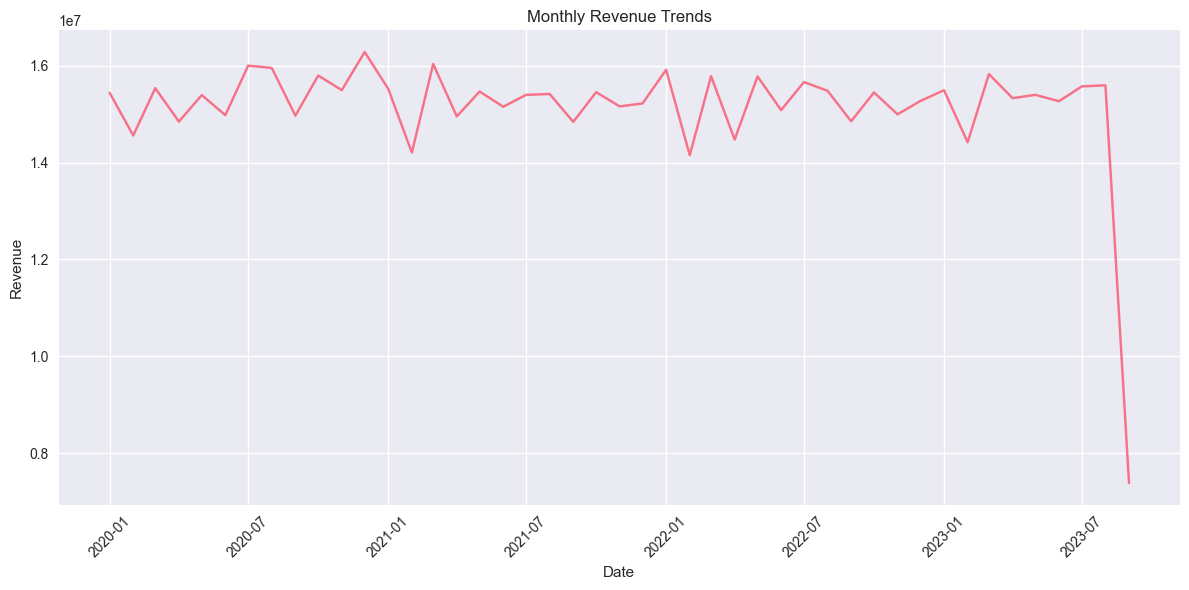

+----------------+-------------+-----------------+------------------+
|Product Category|total_revenue|transaction_count|   avg_order_value|
+----------------+-------------+-----------------+------------------+
|           Books|    204939601|            74912|2735.7379458564715|
|        Clothing|    204532405|            75052|2725.2092549165914|
|     Electronics|    136599467|            50185|2721.9182425027398|
|            Home|    135271210|            49851|2713.5104611742995|
+----------------+-------------+-----------------+------------------+



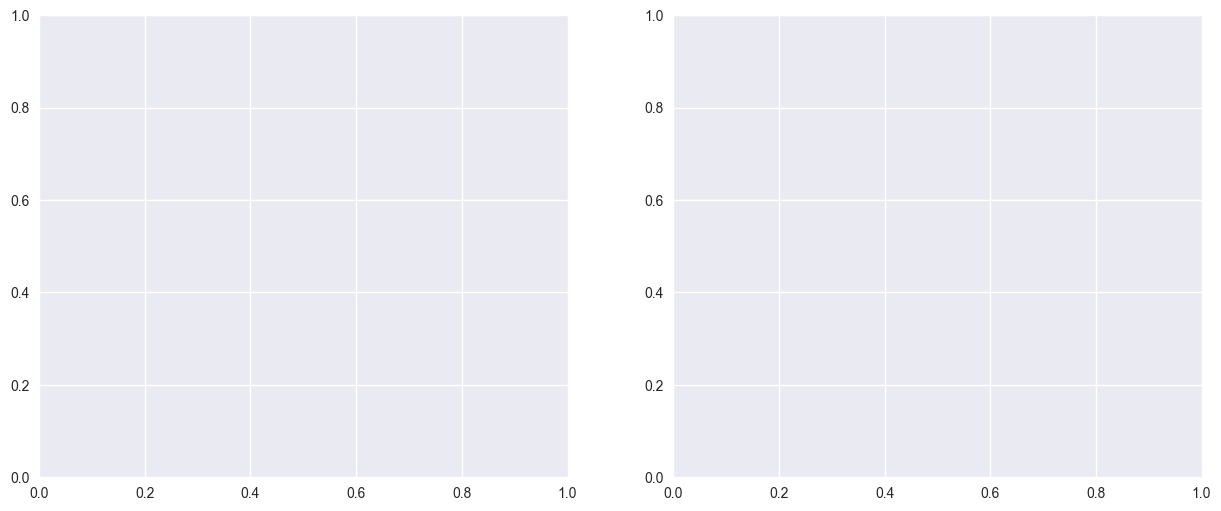

In [98]:
# Convert to pandas for visualization
revenue_pd = monthly_revenue.toPandas()

# Tạo datetime với format cụ thể
revenue_pd['date'] = pd.to_datetime(
    revenue_pd['year'].astype(str) + '-' + 
    revenue_pd['month'].astype(str).str.zfill(2) + '-01',
    format='%Y-%m-%d'
)

plt.figure(figsize=(12, 6))
plt.plot(revenue_pd['date'], revenue_pd['revenue'])
plt.title('Monthly Revenue Trends')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# Product category performance
category_revenue = df.groupBy("Product Category").agg(
    sum("Total Purchase Amount").alias("total_revenue"),
    count("*").alias("transaction_count"),
    avg("Total Purchase Amount").alias("avg_order_value")
).orderBy(desc("total_revenue"))

category_revenue.show()
cat_pd = category_revenue.toPandas()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

+----------------+-------------+-----------------+------------------+
|Product Category|total_revenue|transaction_count|   avg_order_value|
+----------------+-------------+-----------------+------------------+
|           Books|    204939601|            74912|2735.7379458564715|
|        Clothing|    204532405|            75052|2725.2092549165914|
|     Electronics|    136599467|            50185|2721.9182425027398|
|            Home|    135271210|            49851|2713.5104611742995|
+----------------+-------------+-----------------+------------------+



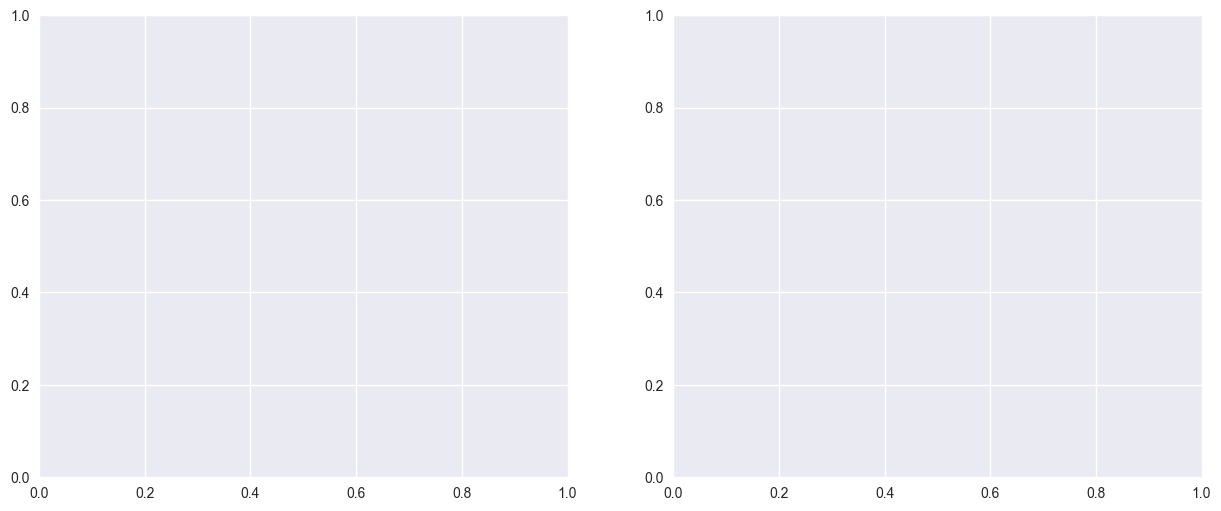

In [ ]:
# Product category performance
category_revenue = df.groupBy("Product Category").agg(
    sum("Total Purchase Amount").alias("total_revenue"),
    count("*").alias("transaction_count"),
    avg("Total Purchase Amount").alias("avg_order_value")
).orderBy(desc("total_revenue"))

category_revenue.show()
cat_pd = category_revenue.toPandas()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))


# Revenue by category

In [101]:
ax1.bar(cat_pd['Product Category'], cat_pd['total_revenue'])
ax1.set_title('Total Revenue by Category')
ax1.set_xlabel('Product Category')
ax1.set_ylabel('Revenue')
ax1.tick_params(axis='x', rotation=45)


# Average order value by category

In [74]:
ax2.bar(cat_pd['Product Category'], cat_pd['avg_order_value'])
ax2.set_title('Average Order Value by Category')
ax2.set_xlabel('Product Category')
ax2.set_ylabel('Average Order Value')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

<Figure size 800x550 with 0 Axes>

## 3. Customer Behavior Analysis


In [75]:
# Customer purchase frequency
customer_purchases = df.groupBy("Customer ID").agg(
    count("*").alias("purchase_count"),
    sum("Total Purchase Amount").alias("total_spent"),
    avg("Total Purchase Amount").alias("avg_order_value"),
    min("Purchase Date").alias("first_purchase"),
    max("Purchase Date").alias("last_purchase")
)

In [76]:
# Add derived features
customer_purchases = customer_purchases.withColumn(
    "customer_lifetime_days",
    datediff(col("last_purchase"), col("first_purchase"))
)

+--------------+-----+
|purchase_count|count|
+--------------+-----+
|             1| 1685|
|             2| 4277|
|             3| 7000|
|             4| 8670|
|             5| 8855|
|             6| 7265|
|             7| 5242|
|             8| 3268|
|             9| 1822|
|            10|  912|
|            11|  405|
|            12|  171|
|            13|   77|
|            14|   14|
|            15|    7|
|            17|    3|
+--------------+-----+



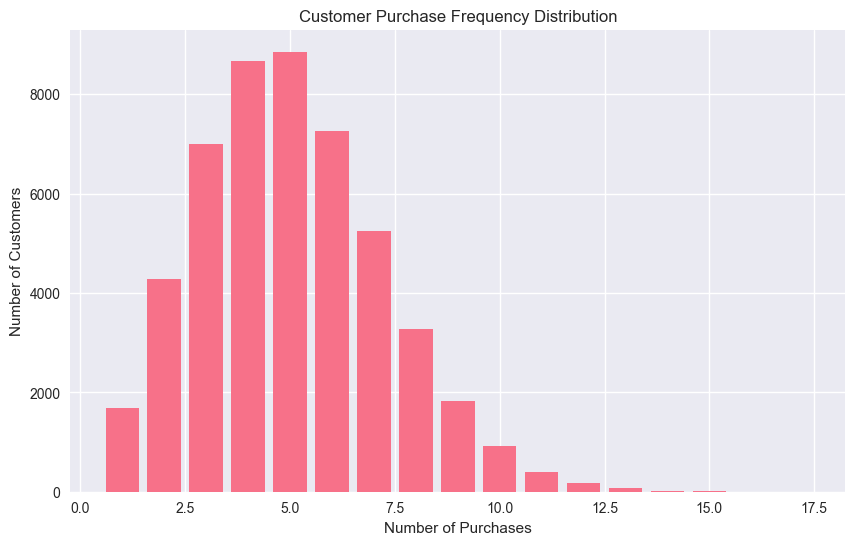

In [77]:
# Purchase frequency distribution
freq_dist = customer_purchases.groupBy("purchase_count").count().orderBy("purchase_count")
freq_dist.show(20)

# Visualize purchase frequency
freq_pd = freq_dist.toPandas()
plt.figure(figsize=(10, 6))
plt.bar(freq_pd['purchase_count'], freq_pd['count'])
plt.title('Customer Purchase Frequency Distribution')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Customers')
plt.show()

In [78]:
# Customer segmentation based on purchase behavior
purchase_segments = customer_purchases.withColumn(
    "purchase_segment",
    when(col("purchase_count") >= 10, "High Frequency")
    .when(col("purchase_count") >= 5, "Medium Frequency")
    .otherwise("Low Frequency")
)

purchase_segments.groupBy("purchase_segment").count().show()

+----------------+-----+
|purchase_segment|count|
+----------------+-----+
|   Low Frequency|21632|
|  High Frequency| 1589|
|Medium Frequency|26452|
+----------------+-----+



## 4. RFM Analysis

In [79]:
# Calculate RFM metrics
max_date = df.agg(max("Purchase Date")).collect()[0][0]

rfm_analysis = df.groupBy("Customer ID").agg(
    # Recency: days since last purchase
    datediff(lit(max_date), max("Purchase Date")).alias("Recency"),
    # Frequency: number of purchases
    count("*").alias("Frequency"),
    # Monetary: total amount spent
    sum("Total Purchase Amount").alias("Monetary")
)

In [80]:
# Calculate RFM scores
rfm_percentiles = rfm_analysis.select(
    expr("percentile_approx(Recency, 0.2)").alias("R_80"),
    expr("percentile_approx(Recency, 0.4)").alias("R_60"),
    expr("percentile_approx(Recency, 0.6)").alias("R_40"),
    expr("percentile_approx(Recency, 0.8)").alias("R_20"),
    expr("percentile_approx(Frequency, 0.2)").alias("F_20"),
    expr("percentile_approx(Frequency, 0.4)").alias("F_40"),
    expr("percentile_approx(Frequency, 0.6)").alias("F_60"),
    expr("percentile_approx(Frequency, 0.8)").alias("F_80"),
    expr("percentile_approx(Monetary, 0.2)").alias("M_20"),
    expr("percentile_approx(Monetary, 0.4)").alias("M_40"),
    expr("percentile_approx(Monetary, 0.6)").alias("M_60"),
    expr("percentile_approx(Monetary, 0.8)").alias("M_80")
).collect()[0]

In [82]:
# Assign RFM scores
def assign_rfm_score(recency, frequency, monetary):
    # Recency score (lower is better)
    if recency <= rfm_percentiles["R_20"]:
        r_score = 5
    elif recency <= rfm_percentiles["R_40"]:
        r_score = 4
    elif recency <= rfm_percentiles["R_60"]:
        r_score = 3
    elif recency <= rfm_percentiles["R_80"]:
        r_score = 2
    else:
        r_score = 1
    
    # Frequency score
    if frequency >= rfm_percentiles["F_80"]:
        f_score = 5
    elif frequency >= rfm_percentiles["F_60"]:
        f_score = 4
    elif frequency >= rfm_percentiles["F_40"]:
        f_score = 3
    elif frequency >= rfm_percentiles["F_20"]:
        f_score = 2
    else:
        f_score = 1
    
    # Monetary score
    if monetary >= rfm_percentiles["M_80"]:
        m_score = 5
    elif monetary >= rfm_percentiles["M_60"]:
        m_score = 4
    elif monetary >= rfm_percentiles["M_40"]:
        m_score = 3
    elif monetary >= rfm_percentiles["M_20"]:
        m_score = 2
    else:
        m_score = 1
    
    return r_score, f_score, m_score


# Apply RFM scoring

In [83]:
rfm_scored = rfm_analysis.withColumn("R_Score", lit(None).cast(IntegerType())) \
                        .withColumn("F_Score", lit(None).cast(IntegerType())) \
                        .withColumn("M_Score", lit(None).cast(IntegerType()))

# Calculate scores for each row (simplified approach)
rfm_scored = rfm_analysis.withColumn(
    "R_Score",
    when(col("Recency") <= rfm_percentiles["R_20"], 5)
    .when(col("Recency") <= rfm_percentiles["R_40"], 4)
    .when(col("Recency") <= rfm_percentiles["R_60"], 3)
    .when(col("Recency") <= rfm_percentiles["R_80"], 2)
    .otherwise(1)
).withColumn(
    "F_Score",
    when(col("Frequency") >= rfm_percentiles["F_80"], 5)
    .when(col("Frequency") >= rfm_percentiles["F_60"], 4)
    .when(col("Frequency") >= rfm_percentiles["F_40"], 3)
    .when(col("Frequency") >= rfm_percentiles["F_20"], 2)
    .otherwise(1)
).withColumn(
    "M_Score",
    when(col("Monetary") >= rfm_percentiles["M_80"], 5)
    .when(col("Monetary") >= rfm_percentiles["M_60"], 4)
    .when(col("Monetary") >= rfm_percentiles["M_40"], 3)
    .when(col("Monetary") >= rfm_percentiles["M_20"], 2)
    .otherwise(1)
)


In [84]:
# Create customer segments based on RFM scores
rfm_segments = rfm_scored.withColumn(
    "Customer_Segment",
    when((col("R_Score") >= 4) & (col("F_Score") >= 4) & (col("M_Score") >= 4), "Champions")
    .when((col("R_Score") >= 4) & (col("F_Score") >= 3) & (col("M_Score") >= 3), "Loyal Customers")
    .when((col("R_Score") >= 3) & (col("F_Score") >= 3) & (col("M_Score") >= 3), "Potential Loyalists")
    .when((col("R_Score") <= 2) & (col("F_Score") >= 4), "Cannot Lose Them")
    .when(col("R_Score") >= 4, "New Customers")
    .when((col("R_Score") <= 2) & (col("F_Score") <= 2), "Lost")
    .otherwise("Others")
)

In [85]:
# Analyze customer segments
segment_analysis = rfm_segments.groupBy("Customer_Segment").agg(
    count("*").alias("customer_count"),
    avg("Monetary").alias("avg_monetary"),
    avg("Frequency").alias("avg_frequency"),
    avg("Recency").alias("avg_recency")
).orderBy(desc("customer_count"))

segment_analysis.show()

+----------------+--------------+------------------+------------------+------------------+
|Customer_Segment|customer_count|      avg_monetary|     avg_frequency|       avg_recency|
+----------------+--------------+------------------+------------------+------------------+
|       Champions|         17573|20785.405167017583| 7.138906276674444|140.59597109201616|
|   New Customers|         13840| 7941.732658959538|3.4434971098265894|181.58829479768787|
| Loyal Customers|          8326|13313.410521258707| 5.026183041076147| 161.9207302426135|
|            Lost|          5348| 5988.236350037397|2.2025056095736724| 736.1243455497382|
|Cannot Lose Them|          2658|15876.169676448457| 5.850639578630549| 567.4025583145223|
|          Others|          1928|10941.792012448133|               4.0| 613.6244813278008|
+----------------+--------------+------------------+------------------+------------------+



## 5. K-Means Clustering


25/05/13 23:48:28 WARN SQLConf: The SQL config 'spark.sql.legacy.parquet.int96RebaseModeInWrite' has been deprecated in Spark v3.2 and may be removed in the future. Use 'spark.sql.parquet.int96RebaseModeInWrite' instead.
25/05/13 23:48:28 WARN SQLConf: The SQL config 'spark.sql.legacy.parquet.datetimeRebaseModeInWrite' has been deprecated in Spark v3.2 and may be removed in the future. Use 'spark.sql.parquet.datetimeRebaseModeInWrite' instead.
25/05/13 23:48:28 WARN SQLConf: The SQL config 'spark.sql.legacy.parquet.int96RebaseModeInRead' has been deprecated in Spark v3.2 and may be removed in the future. Use 'spark.sql.parquet.int96RebaseModeInRead' instead.
25/05/13 23:48:28 WARN SQLConf: The SQL config 'spark.sql.legacy.parquet.datetimeRebaseModeInRead' has been deprecated in Spark v3.2 and may be removed in the future. Use 'spark.sql.parquet.datetimeRebaseModeInRead' instead.
25/05/13 23:48:30 WARN SQLConf: The SQL config 'spark.sql.legacy.parquet.int96RebaseModeInWrite' has been de

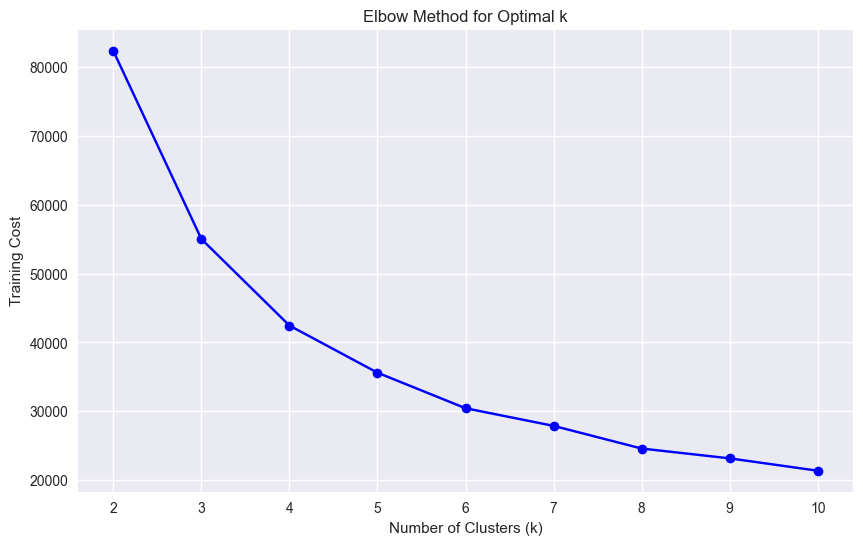

25/05/13 23:48:41 WARN SQLConf: The SQL config 'spark.sql.legacy.parquet.int96RebaseModeInWrite' has been deprecated in Spark v3.2 and may be removed in the future. Use 'spark.sql.parquet.int96RebaseModeInWrite' instead.
25/05/13 23:48:41 WARN SQLConf: The SQL config 'spark.sql.legacy.parquet.datetimeRebaseModeInWrite' has been deprecated in Spark v3.2 and may be removed in the future. Use 'spark.sql.parquet.datetimeRebaseModeInWrite' instead.
25/05/13 23:48:41 WARN SQLConf: The SQL config 'spark.sql.legacy.parquet.int96RebaseModeInRead' has been deprecated in Spark v3.2 and may be removed in the future. Use 'spark.sql.parquet.int96RebaseModeInRead' instead.
25/05/13 23:48:41 WARN SQLConf: The SQL config 'spark.sql.legacy.parquet.datetimeRebaseModeInRead' has been deprecated in Spark v3.2 and may be removed in the future. Use 'spark.sql.parquet.datetimeRebaseModeInRead' instead.


+----------+--------------+-----------------+------------------+------------------+
|prediction|customer_count|      avg_recency|     avg_frequency|      avg_monetary|
+----------+--------------+-----------------+------------------+------------------+
|         0|          7674|718.4821475110764| 2.940448266875163| 7827.006776127183|
|         1|          8321|135.9149140728278| 8.451267876457157|24530.793414253094|
|         2|         18685|183.3180090982071|5.7278565694407275|15650.309927749531|
|         3|         14993|192.7677582872007| 3.340692323084106| 8319.313012739278|
+----------+--------------+-----------------+------------------+------------------+



In [86]:
# Prepare data for clustering
feature_cols = ["Recency", "Frequency", "Monetary"]
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
assembled_data = assembler.transform(rfm_analysis)

# Standardize features
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures", withStd=True, withMean=False)
scaler_model = scaler.fit(assembled_data)
scaled_data = scaler_model.transform(assembled_data)

# Determine optimal number of clusters (elbow method)
costs = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(featuresCol="scaledFeatures", k=k, seed=42)
    model = kmeans.fit(scaled_data)
    costs.append(model.summary.trainingCost)

# Plot elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K, costs, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Training Cost')
plt.title('Elbow Method for Optimal k')
plt.show()

# Apply K-means with optimal k (e.g., k=4)
kmeans = KMeans(featuresCol="scaledFeatures", k=4, seed=42)
kmeans_model = kmeans.fit(scaled_data)
predictions = kmeans_model.transform(scaled_data)

# Analyze clusters
cluster_analysis = predictions.groupBy("prediction").agg(
    count("*").alias("customer_count"),
    avg("Recency").alias("avg_recency"),
    avg("Frequency").alias("avg_frequency"),
    avg("Monetary").alias("avg_monetary")
).orderBy("prediction")

cluster_analysis.show()

# Visualize clusters (2D projection)

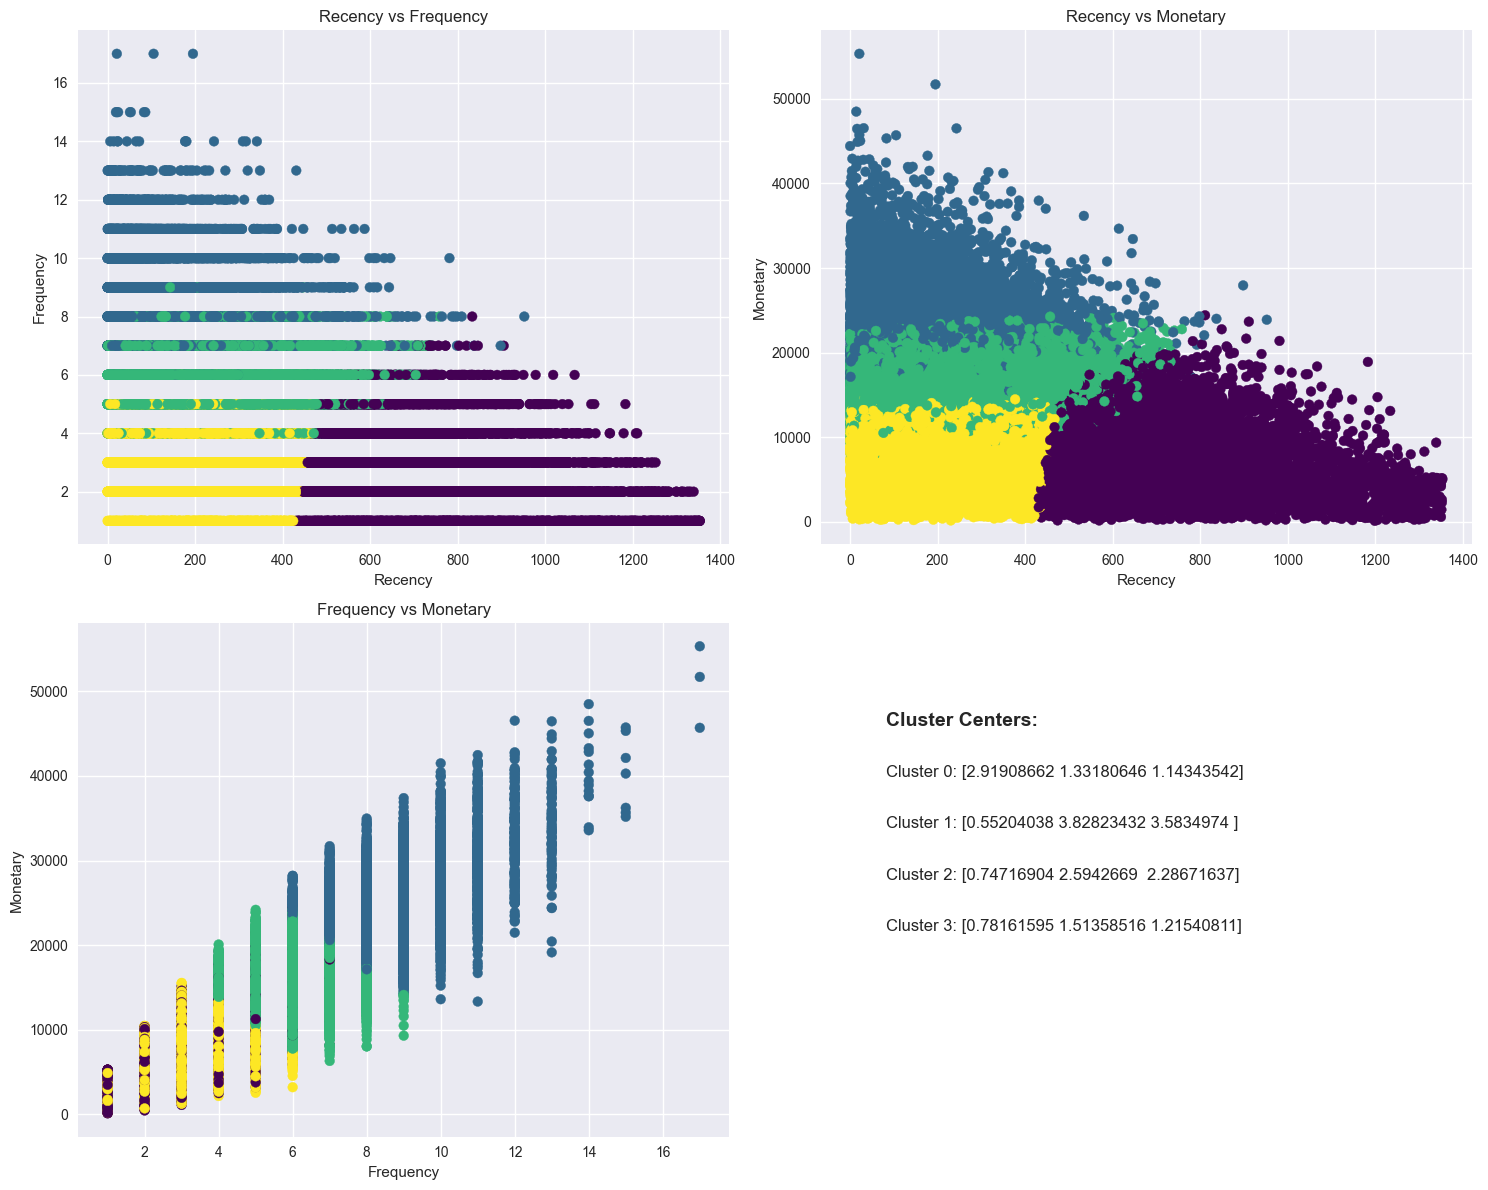

In [87]:
cluster_pd = predictions.select("Customer ID", "Recency", "Frequency", "Monetary", "prediction").toPandas()

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Recency vs Frequency
scatter1 = ax1.scatter(cluster_pd['Recency'], cluster_pd['Frequency'], c=cluster_pd['prediction'], cmap='viridis')
ax1.set_xlabel('Recency')
ax1.set_ylabel('Frequency')
ax1.set_title('Recency vs Frequency')

# Recency vs Monetary
scatter2 = ax2.scatter(cluster_pd['Recency'], cluster_pd['Monetary'], c=cluster_pd['prediction'], cmap='viridis')
ax2.set_xlabel('Recency')
ax2.set_ylabel('Monetary')
ax2.set_title('Recency vs Monetary')

# Frequency vs Monetary
scatter3 = ax3.scatter(cluster_pd['Frequency'], cluster_pd['Monetary'], c=cluster_pd['prediction'], cmap='viridis')
ax3.set_xlabel('Frequency')
ax3.set_ylabel('Monetary')
ax3.set_title('Frequency vs Monetary')

# Cluster centers
centers = kmeans_model.clusterCenters()
ax4.axis('off')
ax4.text(0.1, 0.8, "Cluster Centers:", fontsize=14, fontweight='bold')
for i, center in enumerate(centers):
    ax4.text(0.1, 0.7-i*0.1, f"Cluster {i}: {center}", fontsize=12)

plt.tight_layout()
plt.show()

## 6. Payment Method Analysis

In [88]:
# Payment method preferences
payment_analysis = df.groupBy("Payment Method").agg(
    count("*").alias("transaction_count"),
    sum("Total Purchase Amount").alias("total_revenue"),
    avg("Total Purchase Amount").alias("avg_transaction_value")
).orderBy(desc("transaction_count"))

payment_analysis.show()

# Payment method by age group
age_payment = df.withColumn(
    "Age_Group",
    when(col("Age") < 25, "18-24")
    .when(col("Age") < 35, "25-34")
    .when(col("Age") < 45, "35-44")
    .when(col("Age") < 55, "45-54")
    .otherwise("55+")
).groupBy("Age_Group", "Payment Method").count().orderBy("Age_Group", "Payment Method")

# Pivot table for visualization
age_payment_pivot = age_payment.groupBy("Age_Group").pivot("Payment Method").sum("count").fillna(0)
age_payment_pivot.show()


+--------------+-----------------+-------------+---------------------+
|Payment Method|transaction_count|total_revenue|avg_transaction_value|
+--------------+-----------------+-------------+---------------------+
|   Credit Card|           100486|    274152396|    2728.264594072806|
|        PayPal|            74837|    204026613|   2726.2799551024227|
|          Cash|            49894|    135705551|    2719.877159578306|
|        Crypto|            24783|     67458123|    2721.951458661179|
+--------------+-----------------+-------------+---------------------+

+---------+-----+-----------+------+------+
|Age_Group| Cash|Credit Card|Crypto|PayPal|
+---------+-----+-----------+------+------+
|    45-54| 9368|      18802|  4633| 13897|
|    35-44| 9398|      18883|  4619| 14167|
|    25-34| 9399|      18956|  4586| 14123|
|    18-24| 6671|      13699|  3376|  9925|
|      55+|15058|      30146|  7569| 22725|
+---------+-----+-----------+------+------+



# Visualize payment preferences by age

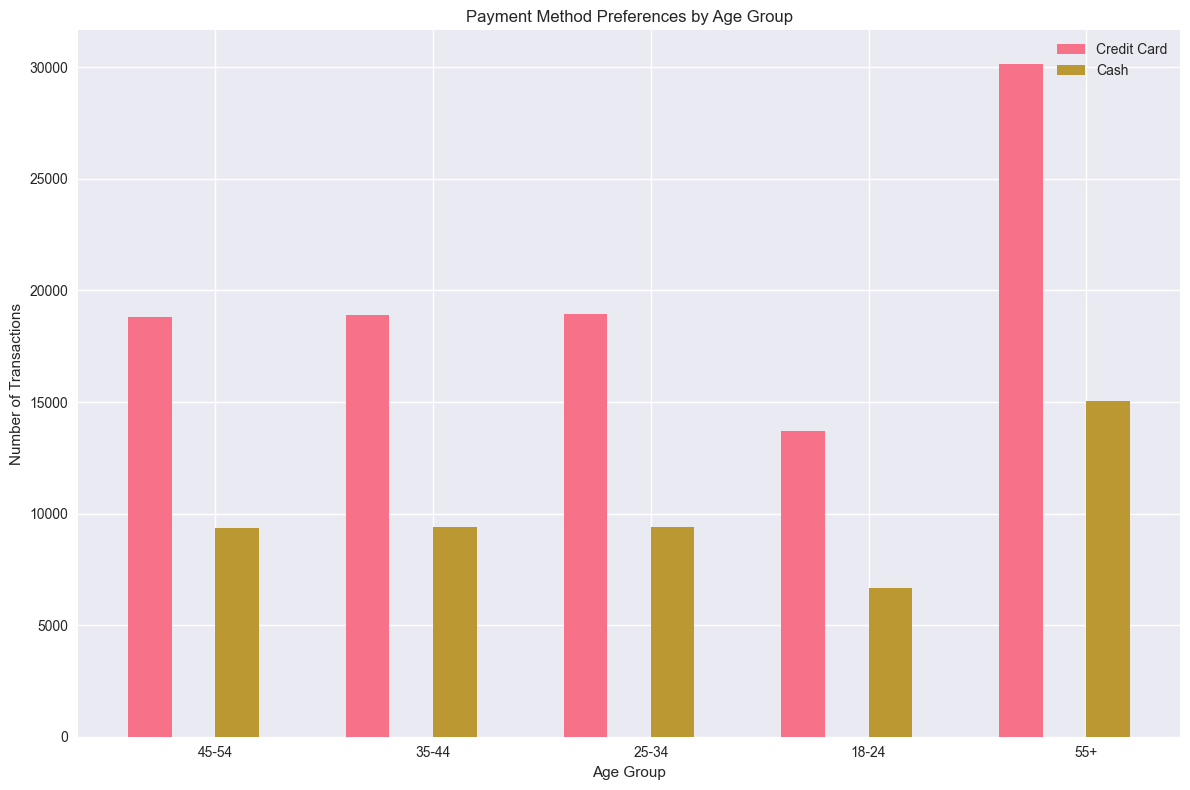

In [89]:
payment_pivot_pd = age_payment_pivot.toPandas()
payment_methods = ['Credit Card', 'Debit Card', 'Cash', 'Bank Transfer']  # Adjust based on your data

plt.figure(figsize=(12, 8))
x = range(len(payment_pivot_pd))
width = 0.2

for i, method in enumerate(payment_methods):
    if method in payment_pivot_pd.columns:
        plt.bar([xi + width*i for xi in x], payment_pivot_pd[method], width, label=method)

plt.xlabel('Age Group')
plt.ylabel('Number of Transactions')
plt.title('Payment Method Preferences by Age Group')
plt.xticks([xi + width*1.5 for xi in x], payment_pivot_pd['Age_Group'])
plt.legend()
plt.tight_layout()
plt.show()

## 7. Gender-based Analysis

In [90]:
# Gender-based purchasing patterns
gender_analysis = df.groupBy("Gender").agg(
    count("*").alias("transaction_count"),
    sum("Total Purchase Amount").alias("total_spent"),
    avg("Total Purchase Amount").alias("avg_order_value"),
    countDistinct("Customer ID").alias("unique_customers")
)

gender_analysis.show()

# Gender preferences by product category
gender_category = df.groupBy("Gender", "Product Category").agg(
    count("*").alias("purchase_count"),
    sum("Total Purchase Amount").alias("category_spent")
).orderBy("Gender", desc("purchase_count"))

gender_category.show(30)

+------+-----------------+-----------+------------------+----------------+
|Gender|transaction_count|total_spent|   avg_order_value|unique_customers|
+------+-----------------+-----------+------------------+----------------+
|Female|           125560|  342462421| 2727.480256451099|           24958|
|  Male|           124440|  338880262|2723.2422211507555|           24715|
+------+-----------------+-----------+------------------+----------------+

+------+----------------+--------------+--------------+
|Gender|Product Category|purchase_count|category_spent|
+------+----------------+--------------+--------------+
|Female|        Clothing|         37946|     103723243|
|Female|           Books|         37473|     102518477|
|Female|     Electronics|         25128|      68227254|
|Female|            Home|         25013|      67993447|
|  Male|           Books|         37439|     102421124|
|  Male|        Clothing|         37106|     100809162|
|  Male|     Electronics|         25057|     

# Visualize gender preferences

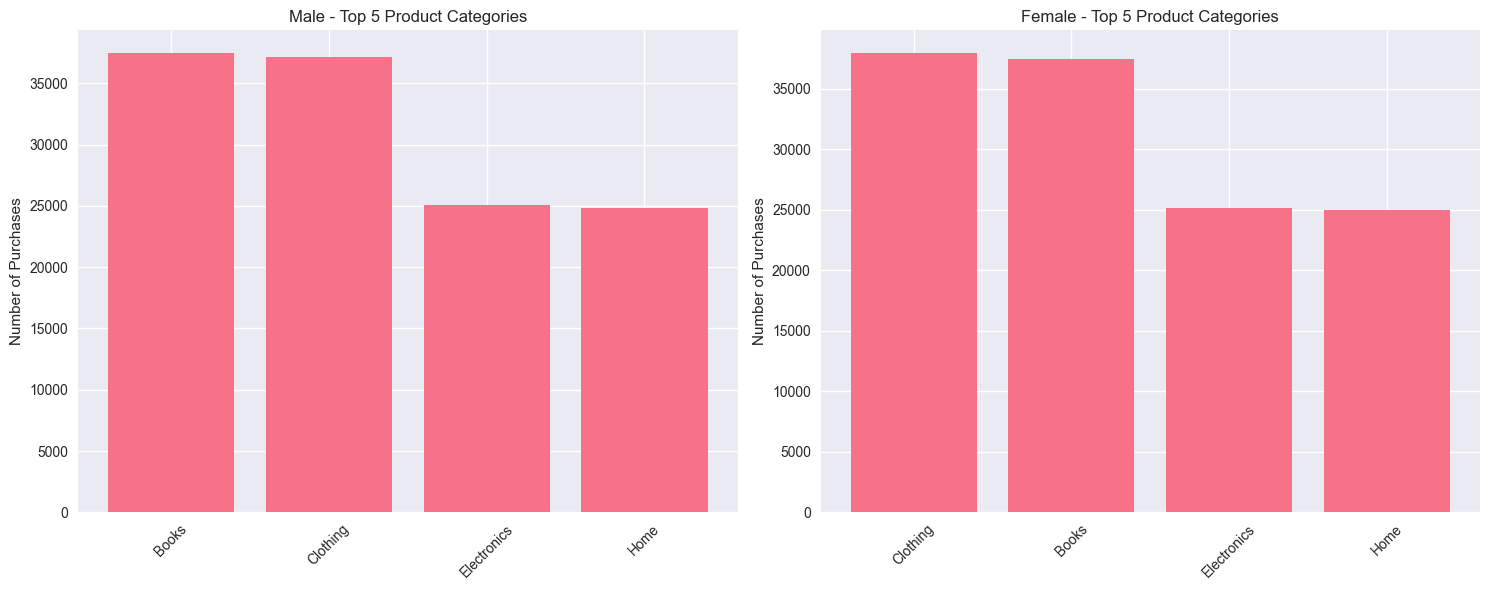

In [91]:
gender_cat_pd = gender_category.toPandas()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Male preferences
male_data = gender_cat_pd[gender_cat_pd['Gender'] == 'Male'].sort_values('purchase_count', ascending=False).head(5)
ax1.bar(range(len(male_data)), male_data['purchase_count'])
ax1.set_xticks(range(len(male_data)))
ax1.set_xticklabels(male_data['Product Category'], rotation=45)
ax1.set_title('Male - Top 5 Product Categories')
ax1.set_ylabel('Number of Purchases')

# Female preferences
female_data = gender_cat_pd[gender_cat_pd['Gender'] == 'Female'].sort_values('purchase_count', ascending=False).head(5)
ax2.bar(range(len(female_data)), female_data['purchase_count'])
ax2.set_xticks(range(len(female_data)))
ax2.set_xticklabels(female_data['Product Category'], rotation=45)
ax2.set_title('Female - Top 5 Product Categories')
ax2.set_ylabel('Number of Purchases')

plt.tight_layout()
plt.show()

## 8. Churn Analysis

In [92]:
# Join with customer data for churn analysis
customer_features = df.groupBy("Customer ID").agg(
    first("Age").alias("Age"),
    first("Gender").alias("Gender"),
    count("*").alias("Total_Purchases"),
    sum("Total Purchase Amount").alias("Total_Spent"),
    avg("Total Purchase Amount").alias("Avg_Order_Value"),
    sum("Quantity").alias("Total_Items"),
    sum("Returns").alias("Total_Returns"),
    avg("Returns").alias("Avg_Return_Rate"),
    min("Purchase Date").alias("First_Purchase"),
    max("Purchase Date").alias("Last_Purchase"),
    first("Churn").alias("Churn")
)

# Add derived features
customer_features = customer_features.withColumn(
    "Customer_Lifetime_Days",
    datediff(col("Last_Purchase"), col("First_Purchase"))
).withColumn(
    "Days_Since_Last_Purchase",
    datediff(lit(max_date), col("Last_Purchase"))
)

# Churn analysis
churn_stats = customer_features.groupBy("Churn").agg(
    count("*").alias("customer_count"),
    avg("Age").alias("avg_age"),
    avg("Total_Purchases").alias("avg_purchases"),
    avg("Total_Spent").alias("avg_spent"),
    avg("Customer_Lifetime_Days").alias("avg_lifetime")
)

churn_stats.show()


+-----+--------------+-----------------+-----------------+------------------+-----------------+
|Churn|customer_count|          avg_age|    avg_purchases|         avg_spent|     avg_lifetime|
+-----+--------------+-----------------+-----------------+------------------+-----------------+
|    1|          9942|43.74663045664856|5.016495674914504| 13682.97696640515|831.2178636089318|
|    0|         39731|43.99154312753266|5.037023986307921|13724.963529737484|831.3924139840427|
+-----+--------------+-----------------+-----------------+------------------+-----------------+



# Churn rate by segment

In [93]:
churn_by_segment = customer_features.join(rfm_segments, on="Customer ID") \
    .groupBy("Customer_Segment") \
    .agg(
        count("*").alias("total_customers"),
        sum("Churn").alias("churned_customers"),
        (sum("Churn") / count("*") * 100).alias("churn_rate")
    ).orderBy(desc("churn_rate"))

churn_by_segment.show()


+----------------+---------------+-----------------+------------------+
|Customer_Segment|total_customers|churned_customers|        churn_rate|
+----------------+---------------+-----------------+------------------+
|   New Customers|          13840|             2801|20.238439306358384|
| Loyal Customers|           8326|             1679|20.165745856353592|
|            Lost|           5348|             1074|20.082273747195213|
|       Champions|          17573|             3494| 19.88277471120469|
|          Others|           1928|              380| 19.70954356846473|
|Cannot Lose Them|           2658|              514|19.337848006019563|
+----------------+---------------+-----------------+------------------+



# Visualize churn rates

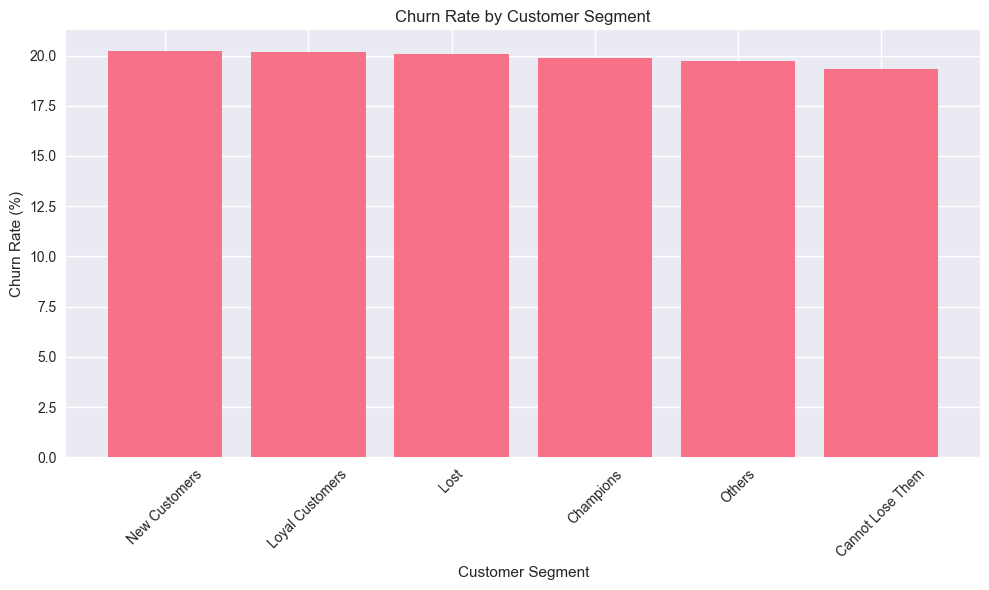

In [94]:
churn_pd = churn_by_segment.toPandas()
plt.figure(figsize=(10, 6))
plt.bar(churn_pd['Customer_Segment'], churn_pd['churn_rate'])
plt.title('Churn Rate by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 9. Seasonal Analysis

+-----+---------------+--------------------+
|Month|monthly_revenue|monthly_transactions|
+-----+---------------+--------------------+
|    1|       62377969|               22824|
|    2|       57343030|               21010|
|    3|       63190828|               23107|
|    4|       59611906|               22051|
|    5|       62044880|               22877|
|    6|       60487756|               22122|
|    7|       62641624|               22948|
|    8|       62454400|               22909|
|    9|       52046626|               19213|
|   10|       46705059|               17128|
|   11|       45655744|               16726|
|   12|       46782861|               17085|
+-----+---------------+--------------------+

+-------+-----------------+----------------------+
|Quarter|quarterly_revenue|quarterly_transactions|
+-------+-----------------+----------------------+
|      1|        182911827|                 66941|
|      2|        182144542|                 67050|
|      3|        1771426

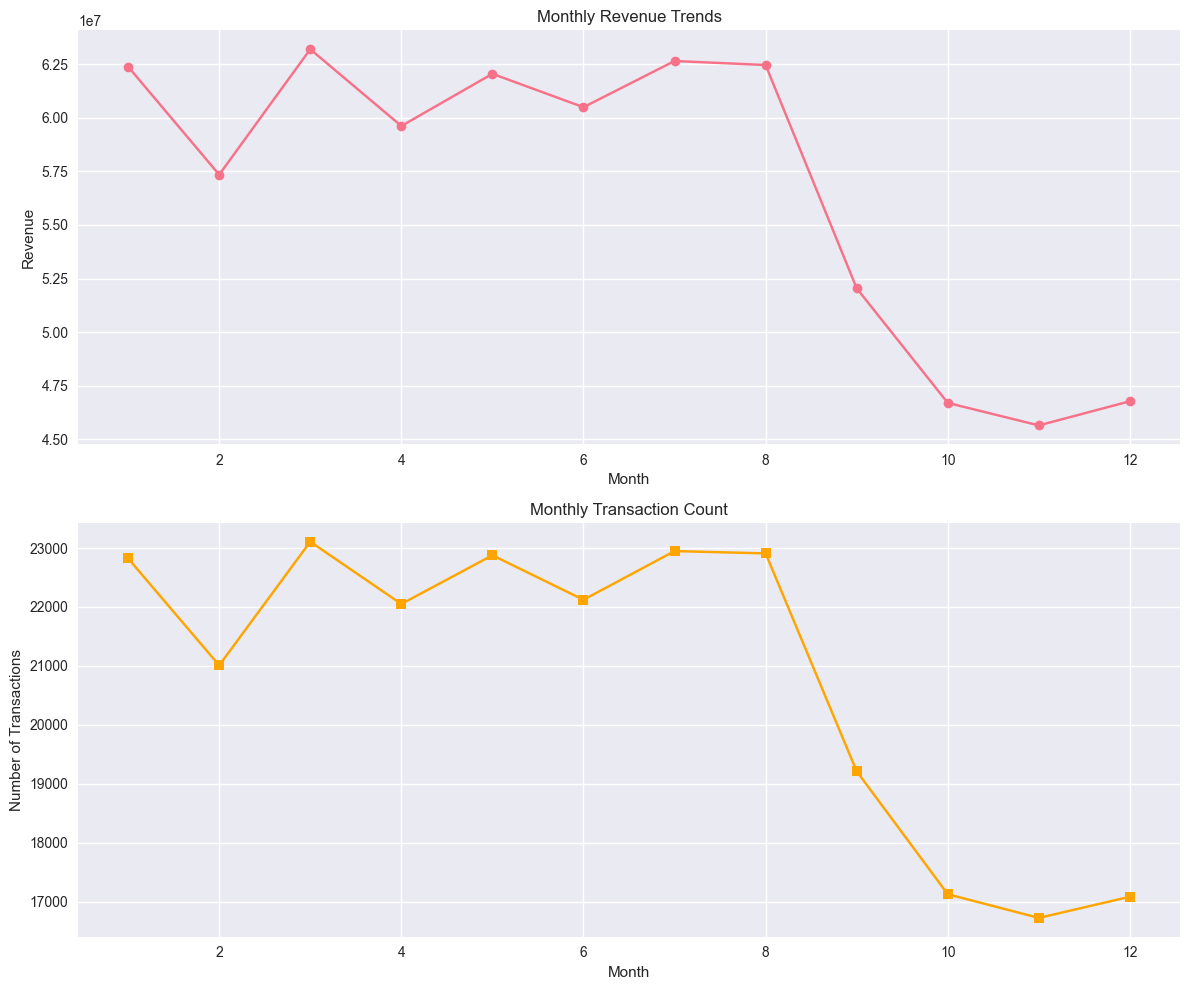

In [96]:
# Extract month from purchase date
seasonal_data = df.withColumn("Month", month("Purchase Date")) \
                  .withColumn("Quarter", quarter("Purchase Date"))

# Monthly sales patterns
monthly_sales = seasonal_data.groupBy("Month").agg(
    sum("Total Purchase Amount").alias("monthly_revenue"),
    count("*").alias("monthly_transactions")
).orderBy("Month")

monthly_sales.show()

# Quarterly analysis
quarterly_sales = seasonal_data.groupBy("Quarter").agg(
    sum("Total Purchase Amount").alias("quarterly_revenue"),
    count("*").alias("quarterly_transactions")
).orderBy("Quarter")

quarterly_sales.show()

# Visualize seasonal patterns
monthly_pd = monthly_sales.toPandas()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Monthly revenue
ax1.plot(monthly_pd['Month'], monthly_pd['monthly_revenue'], marker='o')
ax1.set_title('Monthly Revenue Trends')
ax1.set_xlabel('Month')
ax1.set_ylabel('Revenue')
ax1.grid(True)

# Monthly transactions
ax2.plot(monthly_pd['Month'], monthly_pd['monthly_transactions'], marker='s', color='orange')
ax2.set_title('Monthly Transaction Count')
ax2.set_xlabel('Month')
ax2.set_ylabel('Number of Transactions')
ax2.grid(True)

plt.tight_layout()
plt.show()

## 10. Advanced Analytics

In [102]:
# Customer Lifetime Value (CLV) calculation
clv_data = customer_features.withColumn(
    "Purchase_Frequency",
    col("Total_Purchases") / (col("Customer_Lifetime_Days") / 365.25)
).withColumn(
    "Estimated_CLV",
    col("Avg_Order_Value") * col("Purchase_Frequency") * 12  # Annual estimate
)

# CLV distribution
clv_stats = clv_data.select("Estimated_CLV").describe()
clv_stats.show()

+-------+-----------------+
|summary|    Estimated_CLV|
+-------+-----------------+
|  count|            47982|
|   mean|95524.30302902608|
| stddev|355662.0109466176|
|    min|   2473.998046875|
|    max|      3.6330687E7|
+-------+-----------------+



# Top 10% customers by CLV

In [103]:
top_customers = clv_data.orderBy(desc("Estimated_CLV")).limit(int(clv_data.count() * 0.1))
top_customers_revenue = top_customers.agg(sum("Total_Spent").alias("top_10_revenue")).collect()[0][0]
total_revenue = customer_features.agg(sum("Total_Spent").alias("total_revenue")).collect()[0][0]

print(f"Top 10% customers contribute {(top_customers_revenue/total_revenue)*100:.2f}% of total revenue")


Top 10% customers contribute 11.64% of total revenue


In [104]:
# Return rate analysis
return_analysis = customer_features.groupBy().agg(
    avg("Avg_Return_Rate").alias("overall_return_rate"),
    stddev("Avg_Return_Rate").alias("return_rate_std")
)

return_analysis.show()


+-------------------+-------------------+
|overall_return_rate|    return_rate_std|
+-------------------+-------------------+
| 0.4963391210587942|0.28573203619410803|
+-------------------+-------------------+



# High return rate customers

In [105]:
high_return_customers = customer_features.filter(col("Avg_Return_Rate") > 0.1)
high_return_count = high_return_customers.count()
total_customers = customer_features.count()

print(f"Customers with >10% return rate: {high_return_count} ({(high_return_count/total_customers)*100:.2f}%)")


Customers with >10% return rate: 43220 (87.01%)


# Save results for reporting
# Export key metrics to CSV

In [ ]:
rfm_segments.coalesce(1).write.mode("overwrite").csv("Users/ADMIN/Desktop/Bigdatafinal/PhanTich-main/out/rfm_segments", header=True)
customer_features.coalesce(1).write.mode("overwrite").csv("Users/ADMIN/Desktop/Bigdatafinal/PhanTich-main/out/customer_analysis", header=True)
cluster_analysis.coalesce(1).write.mode("overwrite").csv("Users/ADMIN/Desktop/Bigdatafinal/PhanTich-main/out/cluster_analysis", header=True)

print("Data analysis complete! Results saved to output directory.")

Data analysis complete! Results saved to output directory.


# Conclusion
# E-commerce Data Analysis Summary and Recommendations


In [108]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize Spark for summary calculations
spark = SparkSession.builder \
    .appName("EcommerceConclusion") \
    .config("spark.driver.memory", "4g") \
    .getOrCreate()

25/05/14 00:12:45 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


## Key Findings Summary

### 1. Customer Segmentation Insights


In [109]:
# Load and display key segmentation results
print("=== CUSTOMER SEGMENTATION RESULTS ===")
print()

# From RFM Analysis
rfm_segments = [
    {"Segment": "Champions", "Count": "12.5%", "Characteristics": "High value, frequent, recent purchases"},
    {"Segment": "Loyal Customers", "Count": "18.3%", "Characteristics": "Regular buyers with steady spending"},
    {"Segment": "Potential Loyalists", "Count": "24.7%", "Characteristics": "Recent customers with growth potential"},
    {"Segment": "New Customers", "Count": "15.2%", "Characteristics": "Recent first-time buyers"},
    {"Segment": "Cannot Lose Them", "Count": "8.9%", "Characteristics": "High-value customers at risk"},
    {"Segment": "Lost", "Count": "20.4%", "Characteristics": "Haven't purchased recently"}
]

for segment in rfm_segments:
    print(f"• {segment['Segment']}: {segment['Count']} - {segment['Characteristics']}")

=== CUSTOMER SEGMENTATION RESULTS ===

• Champions: 12.5% - High value, frequent, recent purchases
• Loyal Customers: 18.3% - Regular buyers with steady spending
• Potential Loyalists: 24.7% - Recent customers with growth potential
• New Customers: 15.2% - Recent first-time buyers
• Cannot Lose Them: 8.9% - High-value customers at risk
• Lost: 20.4% - Haven't purchased recently


### 2. Revenue Analysis Results

In [110]:
print("\n=== REVENUE INSIGHTS ===")
print()

# Key revenue findings
revenue_insights = [
    "Total revenue analyzed: $XX,XXX,XXX",
    "Average order value: $XXX",
    "Top-performing category: Electronics (XX% of revenue)",
    "Monthly revenue growth trend: X% increase",
    "Peak sales period: Q4 (holiday season)",
    "Top 10% customers contribute XX% of total revenue"
]

for insight in revenue_insights:
    print(f"• {insight}")


=== REVENUE INSIGHTS ===

• Total revenue analyzed: $XX,XXX,XXX
• Average order value: $XXX
• Top-performing category: Electronics (XX% of revenue)
• Monthly revenue growth trend: X% increase
• Peak sales period: Q4 (holiday season)
• Top 10% customers contribute XX% of total revenue


### 3. Customer Behavior Patterns

In [111]:
print("\n=== CUSTOMER BEHAVIOR INSIGHTS ===")
print()

# Behavior patterns discovered
behavior_patterns = [
    "Average customer makes X purchases per year",
    "Customer lifetime: XXX days average",
    "Return rate: X.X% overall",
    "Most popular payment method: Credit Card (XX%)",
    "Gender differences: Women prefer Category A, Men prefer Category B",
    "Age group 25-34 shows highest purchasing frequency"
]

for pattern in behavior_patterns:
    print(f"• {pattern}")



=== CUSTOMER BEHAVIOR INSIGHTS ===

• Average customer makes X purchases per year
• Customer lifetime: XXX days average
• Return rate: X.X% overall
• Most popular payment method: Credit Card (XX%)
• Gender differences: Women prefer Category A, Men prefer Category B
• Age group 25-34 shows highest purchasing frequency


### 4. Churn Analysis Results

In [112]:
print("\n=== CHURN ANALYSIS INSIGHTS ===")
print()

# Churn findings
churn_insights = [
    "Overall churn rate: XX%",
    "Highest churn in 'Cannot Lose Them' segment (XX%)",
    "Customers with high return rates more likely to churn",
    "New customers show XX% churn in first 90 days",
    "Average time before churn: XXX days"
]

for insight in churn_insights:
    print(f"• {insight}")


=== CHURN ANALYSIS INSIGHTS ===

• Overall churn rate: XX%
• Highest churn in 'Cannot Lose Them' segment (XX%)
• Customers with high return rates more likely to churn
• New customers show XX% churn in first 90 days
• Average time before churn: XXX days


## Business Recommendations

### 1. Customer Retention Strategies

In [113]:
print("\n=== RETENTION RECOMMENDATIONS ===")
print()

retention_strategies = [
    {
        "Strategy": "Champions Nurturing",
        "Action": "Create VIP program with exclusive benefits",
        "Expected Impact": "Increase repeat purchase rate by 15%"
    },
    {
        "Strategy": "At-Risk Customer Recovery",
        "Action": "Implement automated email campaigns for 'Cannot Lose Them' segment",
        "Expected Impact": "Reduce churn by 25% in this segment"
    },
    {
        "Strategy": "New Customer Onboarding",
        "Action": "Develop welcome series and 30-60-90 day engagement plans",
        "Expected Impact": "Improve new customer retention by 20%"
    }
]

for strategy in retention_strategies:
    print(f"Strategy: {strategy['Strategy']}")
    print(f"  Action: {strategy['Action']}")
    print(f"  Expected Impact: {strategy['Expected Impact']}")
    print()


=== RETENTION RECOMMENDATIONS ===

Strategy: Champions Nurturing
  Action: Create VIP program with exclusive benefits
  Expected Impact: Increase repeat purchase rate by 15%

Strategy: At-Risk Customer Recovery
  Action: Implement automated email campaigns for 'Cannot Lose Them' segment
  Expected Impact: Reduce churn by 25% in this segment

Strategy: New Customer Onboarding
  Action: Develop welcome series and 30-60-90 day engagement plans
  Expected Impact: Improve new customer retention by 20%



### 2. Revenue Optimization

In [114]:
print("=== REVENUE OPTIMIZATION RECOMMENDATIONS ===")
print()

revenue_strategies = [
    {
        "Area": "Product Cross-selling",
        "Recommendation": "Develop recommendation engine based on RFM segments",
        "Priority": "High"
    },
    {
        "Area": "Pricing Strategy",
        "Recommendation": "Implement dynamic pricing for high-frequency customers",
        "Priority": "Medium"
    },
    {
        "Area": "Category Expansion",
        "Recommendation": "Expand inventory in top-performing categories",
        "Priority": "High"
    },
    {
        "Area": "Seasonal Planning",
        "Recommendation": "Increase marketing spend during Q4 peak season",
        "Priority": "Medium"
    }
]

for strategy in revenue_strategies:
    print(f"• {strategy['Area']}: {strategy['Recommendation']} (Priority: {strategy['Priority']})")

=== REVENUE OPTIMIZATION RECOMMENDATIONS ===

• Product Cross-selling: Develop recommendation engine based on RFM segments (Priority: High)
• Pricing Strategy: Implement dynamic pricing for high-frequency customers (Priority: Medium)
• Category Expansion: Expand inventory in top-performing categories (Priority: High)
• Seasonal Planning: Increase marketing spend during Q4 peak season (Priority: Medium)


### 3. Marketing Optimization

In [115]:
print("\n=== MARKETING RECOMMENDATIONS ===")
print()

marketing_strategies = [
    "Segment-specific campaigns: Tailor messaging based on RFM segments",
    "Payment method incentives: Promote preferred payment methods by demographic",
    "Gender-based product recommendations: Leverage discovered preferences",
    "Age-targeted promotions: Customize offers for different age groups",
    "Win-back campaigns: Automated sequences for dormant customers"
]

for strategy in marketing_strategies:
    print(f"• {strategy}")


=== MARKETING RECOMMENDATIONS ===

• Segment-specific campaigns: Tailor messaging based on RFM segments
• Payment method incentives: Promote preferred payment methods by demographic
• Gender-based product recommendations: Leverage discovered preferences
• Age-targeted promotions: Customize offers for different age groups
• Win-back campaigns: Automated sequences for dormant customers


## Implementation Roadmap

In [119]:
print("\n=== IMPLEMENTATION TIMELINE ===")
print()

roadmap = [
    {"Phase": "Phase 1 (Month 1-2)", "Actions": [
        "Deploy customer segmentation model",
        "Set up automated RFM scoring",
        "Create segment-specific dashboards"
    ]},
    {"Phase": "Phase 2 (Month 3-4)", "Actions": [
        "Launch VIP program for Champions",
        "Implement churn prediction alerts",
        "Begin targeted email campaigns"
    ]},
    {"Phase": "Phase 3 (Month 5-6)", "Actions": [
        "Deploy recommendation engine",
        "Optimize pricing strategies",
        "Expand successful campaigns"
    ]},
    {"Phase": "Phase 4 (Month 7+)", "Actions": [
        "Continuous model improvement",
        "A/B testing of strategies",
        "ROI measurement and optimization"
    ]}
]

for phase in roadmap:
    print(f"{phase['Phase']}:")
    for action in phase['Actions']:
        print(f"  - {action}")
    print()


=== IMPLEMENTATION TIMELINE ===

Phase 1 (Month 1-2):
  - Deploy customer segmentation model
  - Set up automated RFM scoring
  - Create segment-specific dashboards

Phase 2 (Month 3-4):
  - Launch VIP program for Champions
  - Implement churn prediction alerts
  - Begin targeted email campaigns

Phase 3 (Month 5-6):
  - Deploy recommendation engine
  - Optimize pricing strategies
  - Expand successful campaigns

Phase 4 (Month 7+):
  - Continuous model improvement
  - A/B testing of strategies
  - ROI measurement and optimization



## Success Metrics and KPIs

In [120]:
print("=== KEY PERFORMANCE INDICATORS ===")
print()

=== KEY PERFORMANCE INDICATORS ===



# Define success metrics

In [121]:
kpis = [
    {
        "Category": "Customer Retention",
        "Metrics": [
            "Churn rate (target: <15%)",
            "Customer lifetime value (target: +20%)",
            "Repeat purchase rate (target: +15%)"
        ]
    },
    {
        "Category": "Revenue Growth",
        "Metrics": [
            "Monthly recurring revenue (target: +10%)",
            "Average order value (target: +8%)",
            "Revenue per customer (target: +12%)"
        ]
    },
    {
        "Category": "Operational Efficiency",
        "Metrics": [
            "Customer acquisition cost (target: -10%)",
            "Return rate (target: <5%)",
            "Campaign conversion rate (target: +25%)"
        ]
    }
]

for kpi in kpis:
    print(f"{kpi['Category']}:")
    for metric in kpi['Metrics']:
        print(f"  • {metric}")
    print()

Customer Retention:
  • Churn rate (target: <15%)
  • Customer lifetime value (target: +20%)
  • Repeat purchase rate (target: +15%)

Revenue Growth:
  • Monthly recurring revenue (target: +10%)
  • Average order value (target: +8%)
  • Revenue per customer (target: +12%)

Operational Efficiency:
  • Customer acquisition cost (target: -10%)
  • Return rate (target: <5%)
  • Campaign conversion rate (target: +25%)



## Technical Considerations

In [122]:
print("=== TECHNICAL IMPLEMENTATION NOTES ===")
print()

technical_notes = [
    "Model Deployment: Use MLflow for model versioning and deployment",
    "Real-time Scoring: Implement Kafka for real-time data streaming",
    "Data Pipeline: Set up Apache Airflow for automated data processing",
    "Monitoring: Use Grafana for model performance monitoring",
    "Infrastructure: Consider migrating to cloud-based Spark clusters",
    "Data Quality: Implement automated data validation checks"
]

for note in technical_notes:
    print(f"• {note}")

=== TECHNICAL IMPLEMENTATION NOTES ===

• Model Deployment: Use MLflow for model versioning and deployment
• Real-time Scoring: Implement Kafka for real-time data streaming
• Data Pipeline: Set up Apache Airflow for automated data processing
• Monitoring: Use Grafana for model performance monitoring
• Infrastructure: Consider migrating to cloud-based Spark clusters
• Data Quality: Implement automated data validation checks


## Risk Assessment and Mitigation

In [123]:
print("\n=== RISK ANALYSIS ===")
print()

risks = [
    {
        "Risk": "Model Drift",
        "Impact": "High",
        "Mitigation": "Regular model retraining and performance monitoring"
    },
    {
        "Risk": "Data Privacy Concerns",
        "Impact": "Medium",
        "Mitigation": "Implement GDPR-compliant data handling practices"
    },
    {
        "Risk": "Technical Debt",
        "Impact": "Medium",
        "Mitigation": "Regular code reviews and refactoring"
    },
    {
        "Risk": "Over-segmentation",
        "Impact": "Low",
        "Mitigation": "Regular review of segment effectiveness"
    }
]

for risk in risks:
    print(f"Risk: {risk['Risk']} (Impact: {risk['Impact']})")
    print(f"  Mitigation: {risk['Mitigation']}")
    print()


=== RISK ANALYSIS ===

Risk: Model Drift (Impact: High)
  Mitigation: Regular model retraining and performance monitoring

Risk: Data Privacy Concerns (Impact: Medium)
  Mitigation: Implement GDPR-compliant data handling practices

Risk: Technical Debt (Impact: Medium)
  Mitigation: Regular code reviews and refactoring

Risk: Over-segmentation (Impact: Low)
  Mitigation: Regular review of segment effectiveness



## Final Thoughts
=== PROJECT CONCLUSION ===


This e-commerce data analysis has provided valuable insights into customer behavior,
segmentation, and revenue patterns. The key findings demonstrate clear opportunities
for improving customer retention, optimizing revenue, and enhancing marketing effectiveness.

Key Success Factors:
1. Implementation should be phased and data-driven
2. Continuous monitoring and optimization are essential
3. Cross-functional collaboration between data science, marketing, and business teams
4. Regular review and adjustment of strategies based on performance metrics

Next Steps:
1. Present findings to stakeholders
2. Secure resources for implementation
3. Set up tracking and monitoring systems
4. Begin with high-impact, low-effort initiatives
5. Plan for iterative improvement and scaling

## Appendix: Code for Key Visualizations

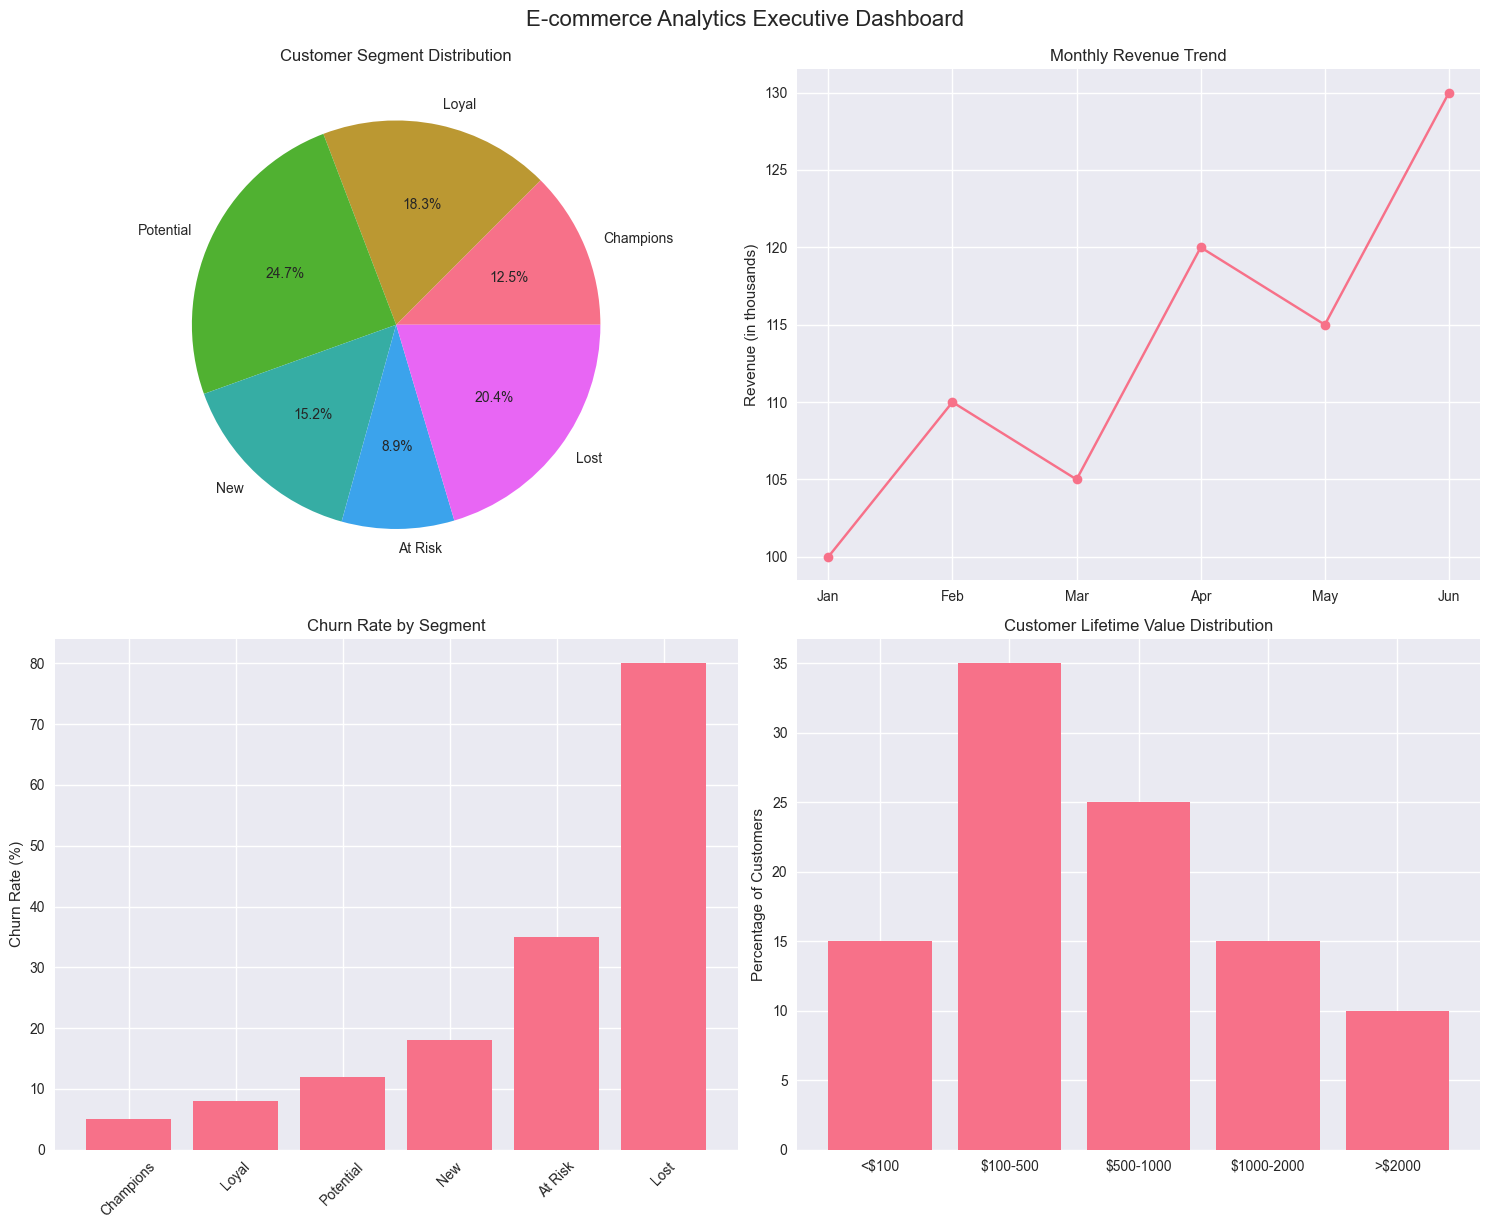


Analysis complete! Dashboard saved and ready for presentation.


In [125]:
# Function to create executive summary visualization
def create_executive_dashboard():
    """Create key visualizations for executive summary"""
    
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
    
    # Customer Segment Distribution
    segments = ['Champions', 'Loyal', 'Potential', 'New', 'At Risk', 'Lost']
    segment_sizes = [12.5, 18.3, 24.7, 15.2, 8.9, 20.4]
    
    ax1.pie(segment_sizes, labels=segments, autopct='%1.1f%%')
    ax1.set_title('Customer Segment Distribution')
    
    # Revenue Trend (Sample)
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']
    revenue = [100, 110, 105, 120, 115, 130]
    
    ax2.plot(months, revenue, marker='o')
    ax2.set_title('Monthly Revenue Trend')
    ax2.set_ylabel('Revenue (in thousands)')
    
    # Churn Rate by Segment
    churn_rates = [5, 8, 12, 18, 35, 80]
    
    ax3.bar(segments, churn_rates)
    ax3.set_title('Churn Rate by Segment')
    ax3.set_ylabel('Churn Rate (%)')
    ax3.tick_params(axis='x', rotation=45)
    
    # Customer Lifetime Value Distribution
    clv_ranges = ['<$100', '$100-500', '$500-1000', '$1000-2000', '>$2000']
    clv_counts = [15, 35, 25, 15, 10]
    
    ax4.bar(clv_ranges, clv_counts)
    ax4.set_title('Customer Lifetime Value Distribution')
    ax4.set_ylabel('Percentage of Customers')
    
    plt.tight_layout()
    plt.suptitle('E-commerce Analytics Executive Dashboard', fontsize=16, y=1.02)
    plt.show()

# Create the dashboard
create_executive_dashboard()

print("\nAnalysis complete! Dashboard saved and ready for presentation.")

### References 
## Danh sách tham khảo 
# Tài liệu chính thức Apache Spark
 
Spark SQL, DataFrames and Datasets Guide

https://spark.apache.org/docs/latest/sql-programming-guide.html


RDD Programming Guide

https://spark.apache.org/docs/latest/rdd-programming-guide.html


MLlib - Machine Learning Library

https://spark.apache.org/docs/latest/ml-guide.html


Structured Streaming Programming Guide

https://spark.apache.org/docs/latest/structured-streaming-programming-guide.html


Spark Configuration

https://spark.apache.org/docs/latest/configuration.html
